In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv('raw_data/2022-01-01_2022-06-30_twitter_transferlearning.csv')
raw_df

,Unnamed: 0,date,negative_bert,neutral_bert,positive_bert
0,0,2022-01-01,32.794384,162.44478,128.76099
1,1,2022-01-02,30.321379,162.43115,123.24740
2,2,2022-01-03,51.884796,251.08696,219.02808
3,3,2022-01-04,39.254400,226.56316,176.18260
4,4,2022-01-05,74.387710,288.17532,211.43690
...,...,...,...,...,...
176,176,2022-06-26,48.231260,264.08527,147.68365
177,177,2022-06-27,69.526820,326.43304,188.04004
178,178,2022-06-28,47.574753,322.94010,181.48535
179,179,2022-06-29,69.620320,310.96848,196.41122


In [4]:
df = raw_df.drop('Unnamed: 0',axis=1)
df

,date,negative_bert,neutral_bert,positive_bert
0,2022-01-01,32.794384,162.44478,128.76099
1,2022-01-02,30.321379,162.43115,123.24740
2,2022-01-03,51.884796,251.08696,219.02808
3,2022-01-04,39.254400,226.56316,176.18260
4,2022-01-05,74.387710,288.17532,211.43690
...,...,...,...,...
176,2022-06-26,48.231260,264.08527,147.68365
177,2022-06-27,69.526820,326.43304,188.04004
178,2022-06-28,47.574753,322.94010,181.48535
179,2022-06-29,69.620320,310.96848,196.41122


In [10]:
y = df['positive_bert']/df.iloc[:,1:].sum(axis=1)

In [12]:
y

0      0.397410
1      0.390024
2      0.419594
3      0.398603
4      0.368357
         ...   
176    0.321051
177    0.321986
178    0.328778
179    0.340401
180    0.335434
Length: 181, dtype: float64

In [23]:
y.rolling(window=2).mean()

0           NaN
1      0.393717
2      0.404809
3      0.409099
4      0.383480
         ...   
176    0.332954
177    0.321519
178    0.325382
179    0.334589
180    0.337917
Length: 181, dtype: float64

In [9]:
128.76099/(32.794384+162.44478+128.76099)

0.39741027407042523

In [30]:
def trad_strat(df):
    X = df[['date']]
#     print(X)
    X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
#     print(X)
    X['MA20_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=21).mean()
    X['MA50_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=51).mean()
    X['Threshold'] = X['Daily_Average_Sentiment']>X['MA50_Sentiment']
    return X

In [32]:
X = trad_strat(df)

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_50424/2822860479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_50424/2822860479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MA20_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=21).mean()


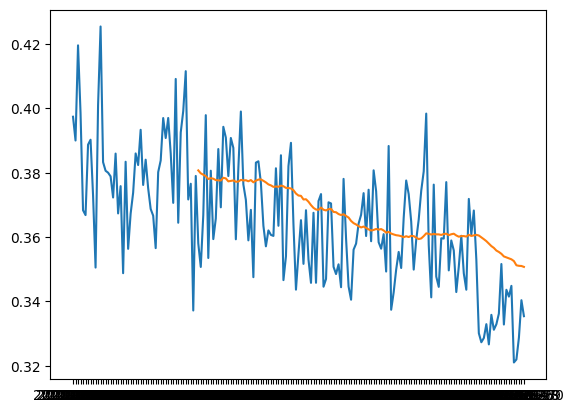

In [39]:
plt.plot(X['date'],X['Daily_Average_Sentiment'])
plt.plot(X['date'],X['MA50_Sentiment'])

In [ ]:
def plot_big(X):
    

In [40]:
!pwd

/Users/suraj/code/giadapi/crypto
